Create tags to train model

In [12]:
import pandas as pd 
from os import listdir
from os.path import isfile, join
import io

tags = [f for f in listdir('part3') if isfile(join('part3', f))]
tags[0] = 'age_gender_race_date'

Export tags to tags.csv for re-use

In [76]:
tags_csv=pd.read_csv(io.StringIO('\n'.join(tags)),delimiter = '_').drop(["date"],axis = 1)
tags_csv.to_csv(r'tags.csv', index = False)

In [14]:
import cv2
import os
import numpy

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

images = load_images_from_folder("part3") 

Displaying sample images

<Figure size 576x576 with 0 Axes>

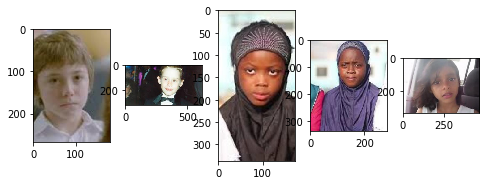

In [15]:
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(8, 8))

fig=plt.figure(figsize=(8, 8))
columns = 5 
rows = 1
for i in range(1, columns*rows +1):
 
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[i][...,::-1])
plt.show()


## Vizualizing Labels

In [77]:
tags_csv.head()

,age,gender,race
0,100,1,0
1,10,0,0
2,10,0,0
3,10,0,1
4,10,1,1


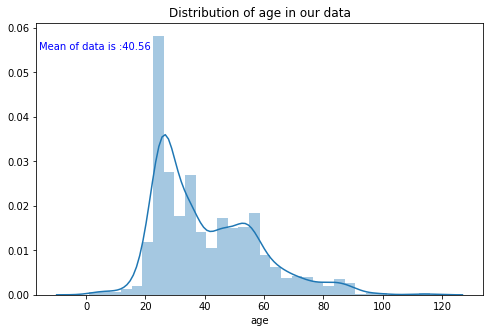

In [78]:
import seaborn as sns
import numpy as np 
fig, ax = plt.subplots(figsize=(8,5))   

sns.distplot(tags_csv['age']) 
plt.title("Distribution of age in our data")
plt.text(-16,.055,"Mean of data is :{}".format(np.round(tags_csv['age'].mean(),2)),fontsize=10,color = 'b')
plt.show()

Creating string tags

In [79]:
tags_csv.loc[tags_csv.gender == 1,'gender'] = 'female'
tags_csv.loc[tags_csv.gender == 0,'gender'] = 'male'
tags_csv.loc[tags_csv.race == 0,'race'] = 'white'
tags_csv.loc[tags_csv.race == 1,'race'] = 'black'
tags_csv.loc[tags_csv.race == 2,'race'] = 'asian'
tags_csv.loc[tags_csv.race == 3,'race'] = 'indian'
tags_csv.loc[tags_csv.race == 4,'race'] = 'other'


In [80]:
tags_csv.head()

,age,gender,race
0,100,female,white
1,10,male,white
2,10,male,white
3,10,male,black
4,10,female,black


In [131]:
import warnings
warnings.filterwarnings('ignore')

In [132]:
def legend_create(race):

    f = len(tags_csv.loc[tags_csv.gender == 'female'][ tags_csv.race == race])
    m = len(tags_csv.loc[tags_csv.gender == 'male'][ tags_csv.race == race])
    leg = '{}(f = {}, m = {})'.format(race,f,m)
    return leg



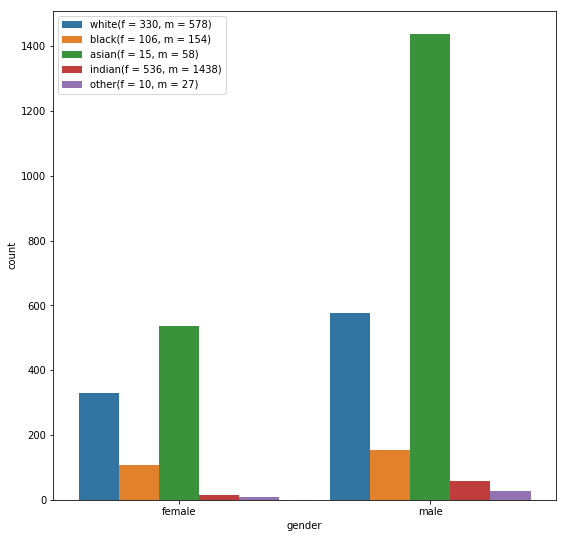

In [136]:
fig, ax = plt.subplots(figsize=(9,9)) 

sns.countplot(x ='gender' , hue = 'race',data = tags_csv)
ax.legend([legend_create('white')
,legend_create('black')
,legend_create('asian')
,legend_create('indian'),
legend_create('other')
])
plt.show()